# Decades Analysis

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Locate the CSV file to be read.
spotify_data_path = "Resources/data.csv"

# Read the Spotify songs data.
spotify_data = pd.read_csv(spotify_data_path)

In [3]:
# Create a smaller, cleaner DataFrame that will be added onto next.
smaller_df = spotify_data[["name", "artists", "year", "popularity"]]
smaller_df

,name,artists,year,popularity
0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",1921,4
1,Clancy Lowered the Boom,['Dennis Day'],1921,5
2,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,1921,5
3,Danny Boy,['Frank Parker'],1921,3
4,When Irish Eyes Are Smiling,['Phil Regan'],1921,2
...,...,...,...,...
170648,China,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",2020,72
170649,Halloweenie III: Seven Days,['Ashnikko'],2020,68
170650,AYA,['MAMAMOO'],2020,76
170651,Darkness,['Eminem'],2020,70


In [4]:
# Establish bins for categorizing years into decades.
decade_bins = [1921, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2020]
labels = ["20s", "30s", "40s", "50s", "60s", "70s", "80s", "90s", "2000s", "2010s","2020s"]

In [5]:
# Use "pd.cut" to categorize popularity based on the bins.
smaller_df["Decade"] = pd.cut(smaller_df["year"], decade_bins, labels=labels, include_lowest=True)
smaller_df

,name,artists,year,popularity,Decade
0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",1921,4,20s
1,Clancy Lowered the Boom,['Dennis Day'],1921,5,20s
2,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,1921,5,20s
3,Danny Boy,['Frank Parker'],1921,3,20s
4,When Irish Eyes Are Smiling,['Phil Regan'],1921,2,20s
...,...,...,...,...,...
170648,China,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",2020,72,2020s
170649,Halloweenie III: Seven Days,['Ashnikko'],2020,68,2020s
170650,AYA,['MAMAMOO'],2020,76,2020s
170651,Darkness,['Eminem'],2020,70,2020s


In [6]:
# Group by "Decade" and find the mean popularity of songs for each decade. Since a song's popularity score is determined by
# current popularity on Spotify, older songs will be listened to less; therefore, their popularity will be smaller.
decade_popularity = pd.DataFrame(smaller_df.groupby(["Decade"]).mean()["popularity"])
decade_popularity

,popularity
Decade,
20s,1.304331
30s,2.536601
40s,1.876252
50s,10.692091
60s,26.551742
70s,35.055800
80s,37.523426
90s,44.192252
2000s,49.734348


In [7]:
# Establish bins for categorizing song popularity (from Song Popularity Analysis; labels for 'least popular' and 'most popular'
# taken out for graphing aesthetic purposes).
popularity_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
pop_labels = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]

In [8]:
# Categorize the popularity of each song based on the popularity bins.
smaller_df["Popularity Bin"] = pd.cut(smaller_df["popularity"], popularity_bins, labels=pop_labels, include_lowest=True)
smaller_df

,name,artists,year,popularity,Decade,Popularity Bin
0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",1921,4,20s,1
1,Clancy Lowered the Boom,['Dennis Day'],1921,5,20s,1
2,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,1921,5,20s,1
3,Danny Boy,['Frank Parker'],1921,3,20s,1
4,When Irish Eyes Are Smiling,['Phil Regan'],1921,2,20s,1
...,...,...,...,...,...,...
170648,China,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",2020,72,2020s,8
170649,Halloweenie III: Seven Days,['Ashnikko'],2020,68,2020s,7
170650,AYA,['MAMAMOO'],2020,76,2020s,8
170651,Darkness,['Eminem'],2020,70,2020s,7


In [9]:
# Add the columns of the variables to test to the "smaller_df" DataFrame and match them by index.
decade_with_variables = pd.merge(smaller_df, spotify_data[["instrumentalness", "loudness", "acousticness","liveness",
                                                           "energy","tempo","speechiness","key","explicit","duration_ms",
                                                           "danceability","valence"]], left_index=True, right_index=True)
decade_with_variables.head()

,name,artists,year,popularity,Decade,Popularity Bin,instrumentalness,loudness,acousticness,liveness,energy,tempo,speechiness,key,explicit,duration_ms,danceability,valence
0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",1921,4,20s,1,0.878000,-20.096,0.982,0.665,0.211,80.954,0.0366,10,0,831667,0.279,0.0594
1,Clancy Lowered the Boom,['Dennis Day'],1921,5,20s,1,0.000000,-12.441,0.732,0.160,0.341,60.936,0.4150,7,0,180533,0.819,0.9630
2,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,1921,5,20s,1,0.913000,-14.850,0.961,0.101,0.166,110.339,0.0339,3,0,500062,0.328,0.0394
3,Danny Boy,['Frank Parker'],1921,3,20s,1,0.000028,-9.316,0.967,0.381,0.309,100.109,0.0354,5,0,210000,0.275,0.1650
4,When Irish Eyes Are Smiling,['Phil Regan'],1921,2,20s,1,0.000002,-10.096,0.957,0.229,0.193,101.665,0.0380,3,0,166693,0.418,0.2530


## Tempo

In [10]:
# Figure out the mean tempo for each decade.
decade_tempo = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["tempo"])
decade_tempo

,tempo
Decade,
20s,110.431253
30s,111.545690
40s,107.379639
50s,110.972049
60s,115.166468
70s,119.858574
80s,121.345255
90s,119.404234
2000s,121.254695


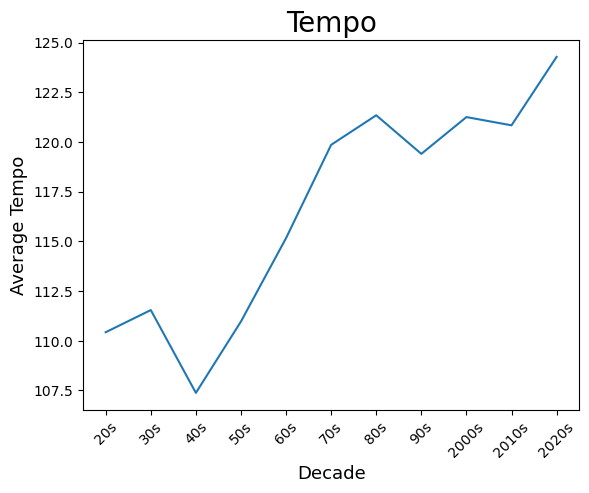

In [11]:
# Create a line graph of the DataFrame.
plt.plot(labels, decade_tempo)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.xticks(rotation = 45)
plt.ylabel("Average Tempo", fontdict={"fontsize": 13})
plt.title("Tempo", fontdict={"fontsize": 20})
plt.show()

In [12]:
# Group by the popularity bins and find the mean tempo for each one.
pop_tempo = pd.DataFrame(decade_with_variables.groupby(["Popularity Bin"]).mean()["tempo"])

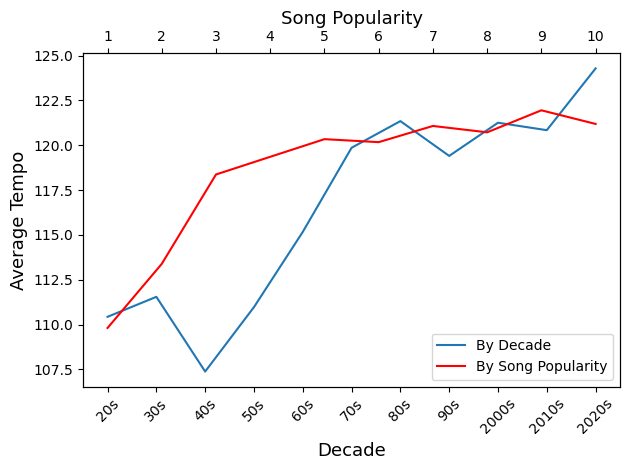

In [13]:
# Create a double line graph comparing means by decade and song popularity.
fig, ax1 = plt.subplots()
plt.xticks(rotation = 45)
ax1.plot(labels, decade_tempo, label="By Decade")
ax2 = ax1.twiny()
ax2.plot(pop_labels, pop_tempo, color="red", label="By Song Popularity")
fig.legend(loc="lower right", bbox_to_anchor=(1,0), bbox_transform=ax1.transAxes)
ax1.set_xlabel("Decade", fontdict={"fontsize": 13})
ax1.set_ylabel("Average Tempo", fontdict={"fontsize": 13})
ax2.set_xlabel("Song Popularity", fontdict={"fontsize": 13})
fig.tight_layout()
plt.show()

## Speechiness

In [14]:
# Figure out the mean speechiness for each decade.
decade_speechiness = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["speechiness"])
decade_speechiness

,speechiness
Decade,
20s,0.291475
30s,0.204065
40s,0.153847
50s,0.093679
60s,0.057731
70s,0.059764
80s,0.062035
90s,0.080528
2000s,0.087719


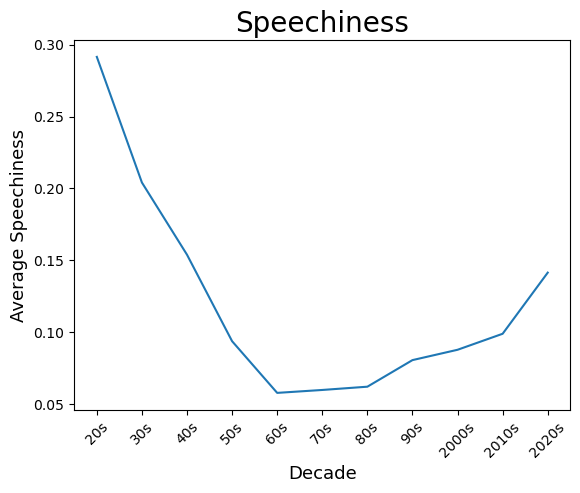

In [15]:
# Create a line graph of the DataFrame.
plt.plot(labels, decade_speechiness)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.xticks(rotation = 45)
plt.ylabel("Average Speechiness", fontdict={"fontsize": 13})
plt.title("Speechiness", fontdict={"fontsize": 20})
plt.show()

In [16]:
# Group by the popularity bins and find the mean speechiness for each one.
pop_speechiness = pd.DataFrame(decade_with_variables.groupby(["Popularity Bin"]).mean()["speechiness"])

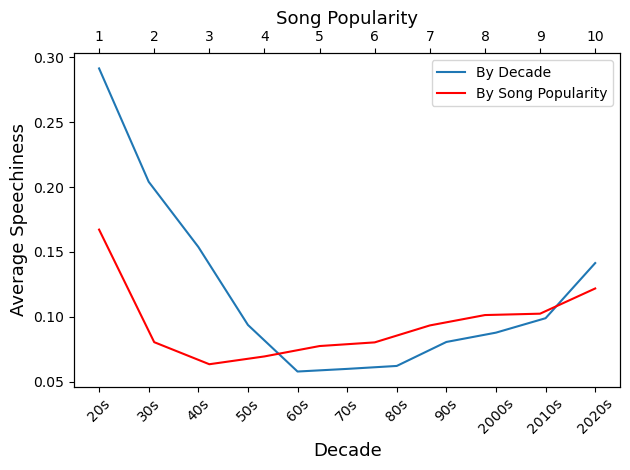

In [63]:
# Create a double line graph comparing means by decade and song popularity.
fig, ax1 = plt.subplots()
plt.xticks(rotation = 45)
ax1.plot(labels, decade_speechiness, label="By Decade")
ax2 = ax1.twiny()
ax2.plot(pop_labels, pop_speechiness, color="red", label="By Song Popularity")
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
ax1.set_xlabel("Decade", fontdict={"fontsize": 13})
ax1.set_ylabel("Average Speechiness", fontdict={"fontsize": 13})
ax2.set_xlabel("Song Popularity", fontdict={"fontsize": 13})
fig.tight_layout()
plt.show()

## Loudness

In [18]:
# Figure out the mean loudness for each decade.
decade_loudness = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["loudness"])
decade_loudness

,loudness
Decade,
20s,-16.699090
30s,-14.214586
40s,-15.331419
50s,-14.731226
60s,-12.676736
70s,-11.424966
80s,-11.226990
90s,-10.004415
2000s,-7.501916


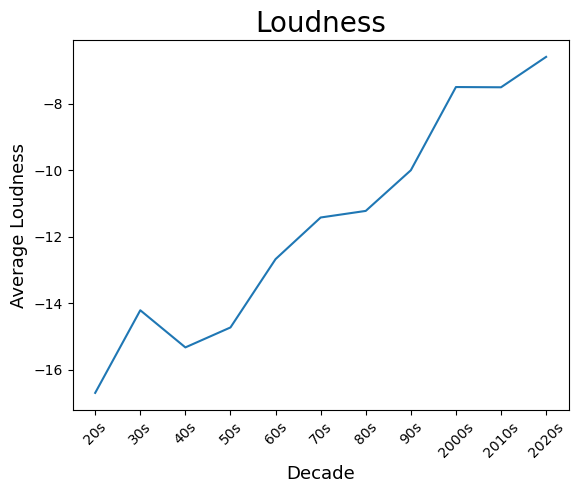

In [19]:
# Create a line graph of the DataFrame.
plt.plot(labels, decade_loudness)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.xticks(rotation = 45)
plt.ylabel("Average Loudness", fontdict={"fontsize": 13})
plt.title("Loudness", fontdict={"fontsize": 20})
plt.show()

In [20]:
# Group by the popularity bins and find the mean loudness for each one.
pop_loudness = pd.DataFrame(decade_with_variables.groupby(["Popularity Bin"]).mean()["loudness"])

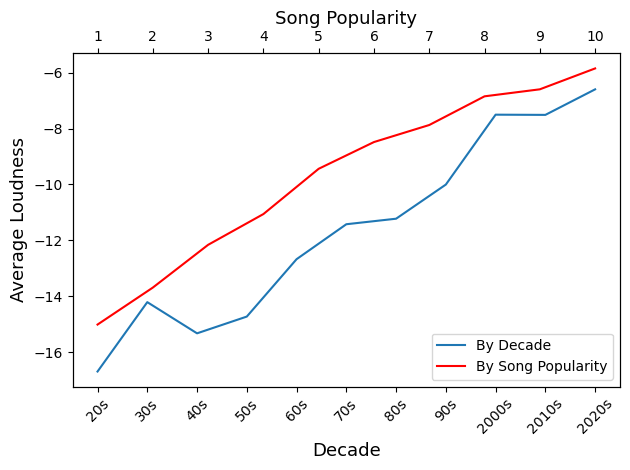

In [21]:
# Create a double line graph comparing means by decade and song popularity.
fig, ax1 = plt.subplots()
plt.xticks(rotation = 45)
ax1.plot(labels, decade_loudness, label="By Decade")
ax2 = ax1.twiny()
ax2.plot(pop_labels, pop_loudness, color="red", label="By Song Popularity")
fig.legend(loc="lower right", bbox_to_anchor=(1,0), bbox_transform=ax1.transAxes)
ax1.set_xlabel("Decade", fontdict={"fontsize": 13})
ax1.set_ylabel("Average Loudness", fontdict={"fontsize": 13})
ax2.set_xlabel("Song Popularity", fontdict={"fontsize": 13})
fig.tight_layout()
plt.show()

## Instrumentalness

In [22]:
# Figure out the mean instrumentalness for each decade.
decade_instrumentalness = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["instrumentalness"])
decade_instrumentalness

,instrumentalness
Decade,
20s,0.377181
30s,0.276707
40s,0.363176
50s,0.247795
60s,0.157578
70s,0.116031
80s,0.122269
90s,0.109744
2000s,0.083848


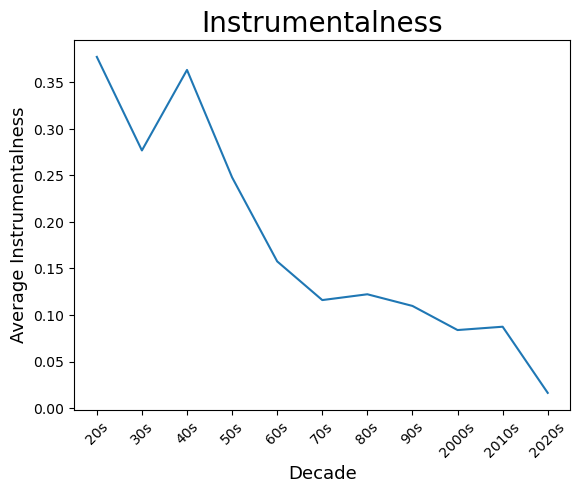

In [23]:
# Create a line graph of the DataFrame.
plt.plot(labels, decade_instrumentalness)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.xticks(rotation = 45)
plt.ylabel("Average Instrumentalness", fontdict={"fontsize": 13})
plt.title("Instrumentalness", fontdict={"fontsize": 20})
plt.show()

In [24]:
# Group by the popularity bins and find the mean instrumentalness for each one.
pop_instrumentalness = pd.DataFrame(decade_with_variables.groupby(["Popularity Bin"]).mean()["instrumentalness"])

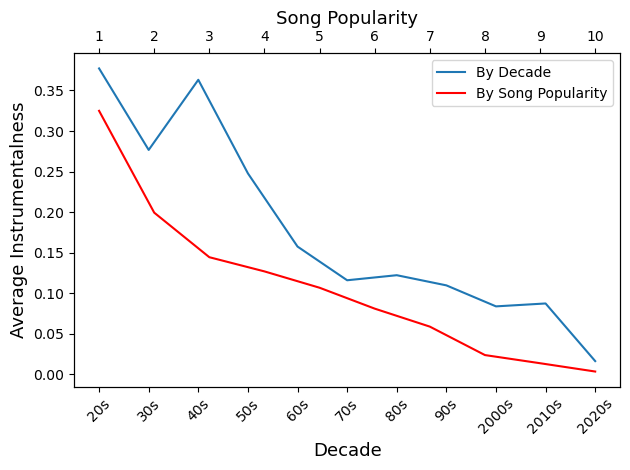

In [62]:
# Create a double line graph comparing means by decade and song popularity.
fig, ax1 = plt.subplots()
plt.xticks(rotation = 45)
ax1.plot(labels, decade_instrumentalness, label="By Decade")
ax2 = ax1.twiny()
ax2.plot(pop_labels, pop_instrumentalness, color="red", label="By Song Popularity")
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
ax1.set_xlabel("Decade", fontdict={"fontsize": 13})
ax1.set_ylabel("Average Instrumentalness", fontdict={"fontsize": 13})
ax2.set_xlabel("Song Popularity", fontdict={"fontsize": 13})
fig.tight_layout()
plt.show()

## Acousticness

In [26]:
# Figure out the mean acousticness for each decade.
decade_acousticness = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["acousticness"])
decade_acousticness

,acousticness
Decade,
20s,0.801554
30s,0.867694
40s,0.870974
50s,0.840334
60s,0.624013
70s,0.400162
80s,0.298634
90s,0.307533
2000s,0.269761


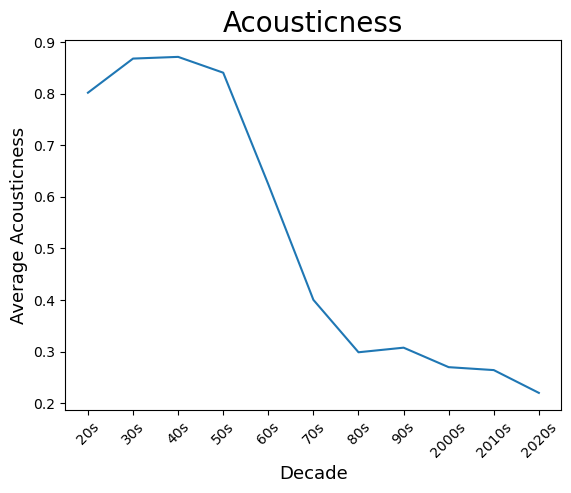

In [27]:
# Create a line graph of the DataFrame.
plt.plot(labels, decade_acousticness)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.xticks(rotation = 45)
plt.ylabel("Average Acousticness", fontdict={"fontsize": 13})
plt.title("Acousticness", fontdict={"fontsize": 20})
plt.show()

In [28]:
# Group by the popularity bins and find the mean acousticness for each one.
pop_acousticness = pd.DataFrame(decade_with_variables.groupby(["Popularity Bin"]).mean()["acousticness"])

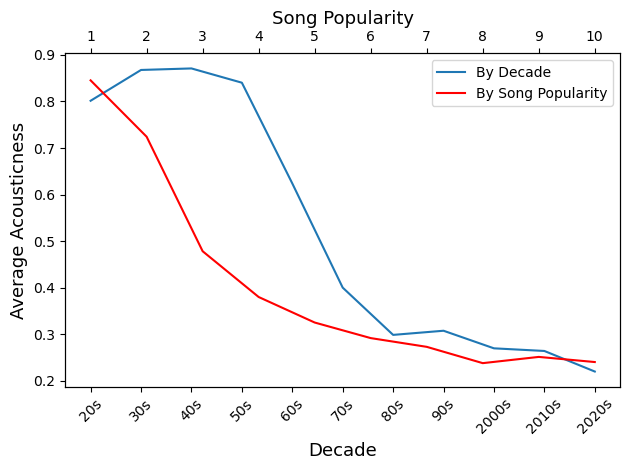

In [61]:
# Create a double line graph comparing means by decade and song popularity.
fig, ax1 = plt.subplots()
plt.xticks(rotation = 45)
ax1.plot(labels, decade_acousticness, label="By Decade")
ax2 = ax1.twiny()
ax2.plot(pop_labels, pop_acousticness, color="red", label="By Song Popularity")
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
ax1.set_xlabel("Decade", fontdict={"fontsize": 13})
ax1.set_ylabel("Average Acousticness", fontdict={"fontsize": 13})
ax2.set_xlabel("Song Popularity", fontdict={"fontsize": 13})
fig.tight_layout()
plt.show()

## Valence

In [30]:
# Figure out the mean valence for each decade.
decade_valence = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["valence"])
decade_valence

,valence
Decade,
20s,0.542143
30s,0.567896
40s,0.487830
50s,0.478597
60s,0.551939
70s,0.585098
80s,0.564420
90s,0.544997
2000s,0.530295


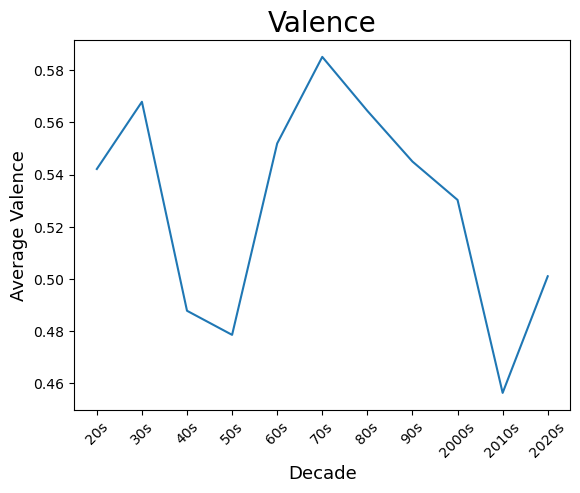

In [31]:
# Create a line graph of the DataFrame.
plt.plot(labels, decade_valence)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.xticks(rotation = 45)
plt.ylabel("Average Valence", fontdict={"fontsize": 13})
plt.title("Valence", fontdict={"fontsize": 20})
plt.show()

In [32]:
# Group by the popularity bins and find the mean valence for each one.
pop_valence = pd.DataFrame(decade_with_variables.groupby(["Popularity Bin"]).mean()["valence"])

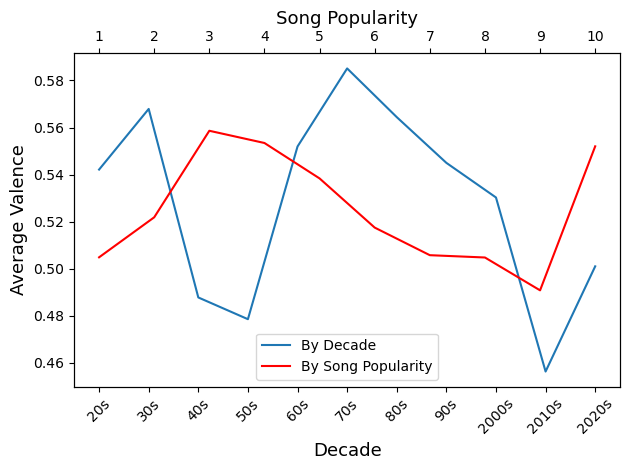

In [60]:
# Create a double line graph comparing means by decade and song popularity.
fig, ax1 = plt.subplots()
plt.xticks(rotation = 45)
ax1.plot(labels, decade_valence, label="By Decade")
ax2 = ax1.twiny()
ax2.plot(pop_labels, pop_valence, color="red", label="By Song Popularity")
fig.legend(loc="lower center", bbox_to_anchor=(0.5,0), bbox_transform=ax1.transAxes)
ax1.set_xlabel("Decade", fontdict={"fontsize": 13})
ax1.set_ylabel("Average Valence", fontdict={"fontsize": 13})
ax2.set_xlabel("Song Popularity", fontdict={"fontsize": 13})
fig.tight_layout()
plt.show()

## Danceability

In [34]:
# Figure out the mean danceability for each decade.
decade_danceability = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["danceability"])
decade_danceability

,danceability
Decade,
20s,0.586963
30s,0.541664
40s,0.473476
50s,0.476858
60s,0.494697
70s,0.524927
80s,0.546385
90s,0.566082
2000s,0.574142


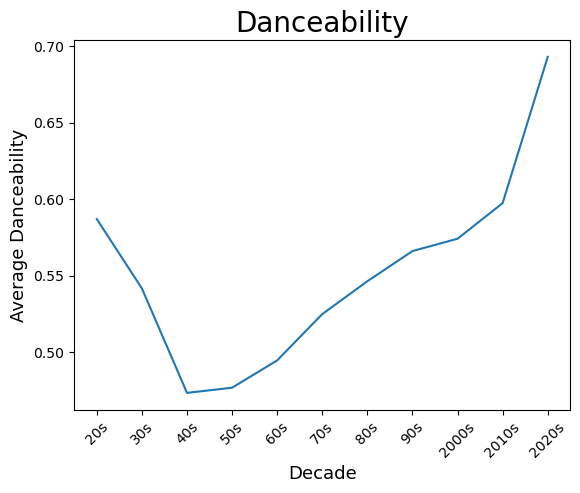

In [35]:
# Create a line graph of the DataFrame.
plt.plot(labels, decade_danceability)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.xticks(rotation = 45)
plt.ylabel("Average Danceability", fontdict={"fontsize": 13})
plt.title("Danceability", fontdict={"fontsize": 20})
plt.show()

In [36]:
# Group by the popularity bins and find the mean danceability for each one.
pop_danceability = pd.DataFrame(decade_with_variables.groupby(["Popularity Bin"]).mean()["danceability"])

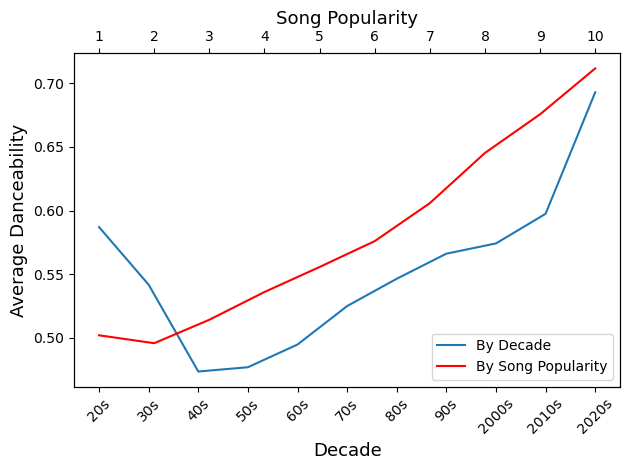

In [37]:
# Create a double line graph comparing means by decade and song popularity.
fig, ax1 = plt.subplots()
plt.xticks(rotation = 45)
ax1.plot(labels, decade_danceability, label="By Decade")
ax2 = ax1.twiny()
ax2.plot(pop_labels, pop_danceability, color="red", label="By Song Popularity")
fig.legend(loc="lower right", bbox_to_anchor=(1,0), bbox_transform=ax1.transAxes)
ax1.set_xlabel("Decade", fontdict={"fontsize": 13})
ax1.set_ylabel("Average Danceability", fontdict={"fontsize": 13})
ax2.set_xlabel("Song Popularity", fontdict={"fontsize": 13})
fig.tight_layout()
plt.show()

## Duration

In [38]:
# Figure out the mean duration for each decade and then convert the means from milliseconds to seconds.
decade_duration_ms = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["duration_ms"])
decade_duration_sec = decade_duration_ms/1000
decade_duration_sec = decade_duration_sec.rename(columns = {"duration_ms": "duration_sec"})
decade_duration_sec

,duration_sec
Decade,
20s,183.769229
30s,207.616600
40s,217.894654
50s,220.482874
60s,211.668431
70s,254.051705
80s,252.120366
90s,248.595563
2000s,239.517407


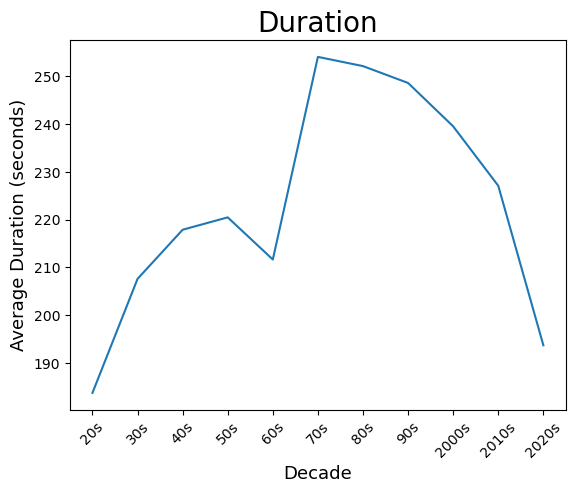

In [39]:
# Create a line graph of the DataFrame.
plt.plot(labels, decade_duration_sec)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.xticks(rotation = 45)
plt.ylabel("Average Duration (seconds)", fontdict={"fontsize": 13})
plt.title("Duration", fontdict={"fontsize": 20})
plt.show()

In [40]:
# Figure out the mean duration for each popularity bin and then convert the means from milliseconds to seconds.
pop_duration_ms = pd.DataFrame(decade_with_variables.groupby(["Popularity Bin"]).mean()["duration_ms"])
pop_duration_sec = pop_duration_ms/1000
pop_duration_sec = pop_duration_sec.rename(columns = {"duration_ms": "duration_sec"})

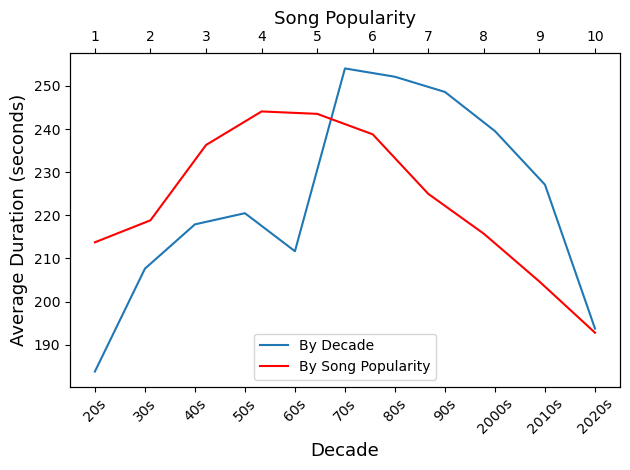

In [59]:
# Create a double line graph comparing means by decade and song popularity.
fig, ax1 = plt.subplots()
plt.xticks(rotation = 45)
ax1.plot(labels, decade_duration_sec, label="By Decade")
ax2 = ax1.twiny()
ax2.plot(pop_labels, pop_duration_sec, color="red", label="By Song Popularity")
fig.legend(loc="lower center", bbox_to_anchor=(0.5,0), bbox_transform=ax1.transAxes)
ax1.set_xlabel("Decade", fontdict={"fontsize": 13})
ax1.set_ylabel("Average Duration (seconds)", fontdict={"fontsize": 13})
ax2.set_xlabel("Song Popularity", fontdict={"fontsize": 13})
fig.tight_layout()
plt.show()

## Energy 

In [42]:
# Figure out the mean energy for each decade.
decade_energy = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["energy"])
decade_energy

,energy
Decade,
20s,0.235133
30s,0.286655
40s,0.254896
50s,0.286753
60s,0.414520
70s,0.533716
80s,0.594715
90s,0.586066
2000s,0.651586


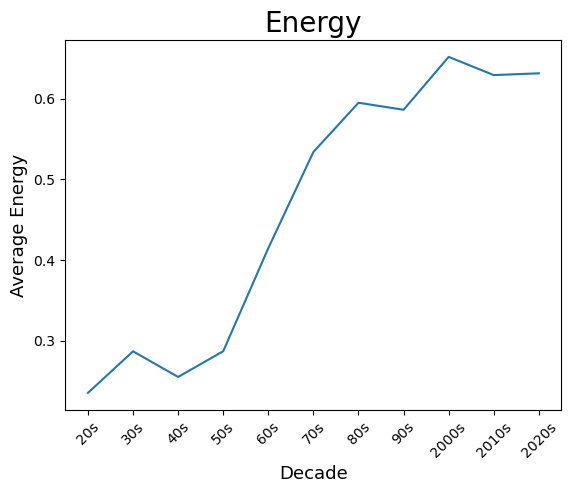

In [43]:
# Create a line graph of the DataFrame.
plt.plot(labels, decade_energy)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.xticks(rotation = 45)
plt.ylabel("Average Energy", fontdict={"fontsize": 13})
plt.title("Energy", fontdict={"fontsize": 20})
plt.show()

In [44]:
# Group by the popularity bins and find the mean energy for each one.
pop_energy = pd.DataFrame(decade_with_variables.groupby(["Popularity Bin"]).mean()["energy"])

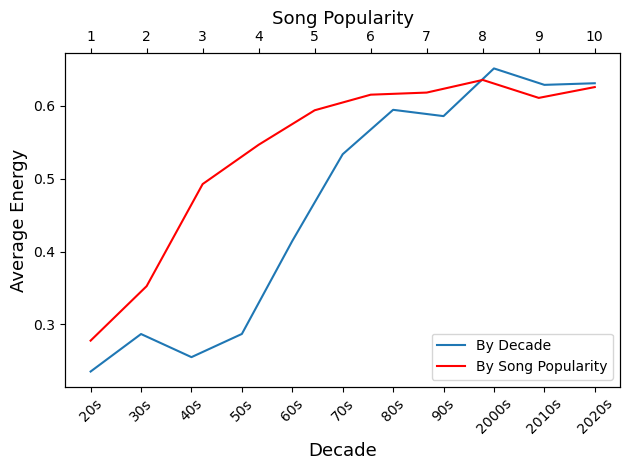

In [45]:
# Create a double line graph comparing means by decade and song popularity.
fig, ax1 = plt.subplots()
plt.xticks(rotation = 45)
ax1.plot(labels, decade_energy, label="By Decade")
ax2 = ax1.twiny()
ax2.plot(pop_labels, pop_energy, color="red", label="By Song Popularity")
fig.legend(loc="lower right", bbox_to_anchor=(1,0), bbox_transform=ax1.transAxes)
ax1.set_xlabel("Decade", fontdict={"fontsize": 13})
ax1.set_ylabel("Average Energy", fontdict={"fontsize": 13})
ax2.set_xlabel("Song Popularity", fontdict={"fontsize": 13})
fig.tight_layout()
plt.show()

## Liveness

In [46]:
# Figure out the mean liveness for each decade.
decade_liveness = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["liveness"])
decade_liveness

,liveness
Decade,
20s,0.210910
30s,0.225639
40s,0.221343
50s,0.209219
60s,0.208687
70s,0.216406
80s,0.204639
90s,0.196547
2000s,0.195582


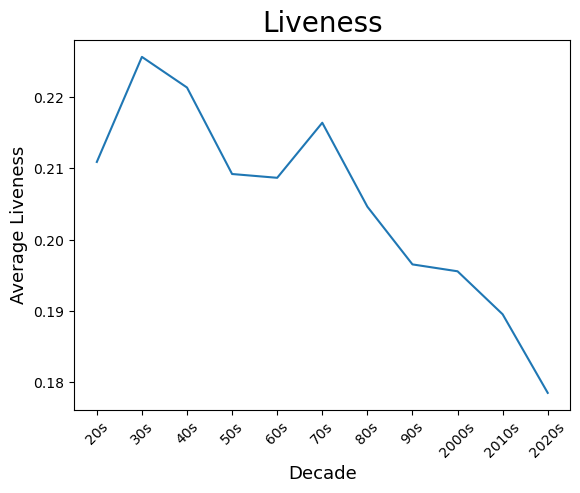

In [47]:
# Create a line graph of the DataFrame.
plt.plot(labels, decade_liveness)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.xticks(rotation = 45)
plt.ylabel("Average Liveness", fontdict={"fontsize": 13})
plt.title("Liveness", fontdict={"fontsize": 20})
plt.show()

In [48]:
# Group by the popularity bins and find the mean liveness for each one.
pop_liveness = pd.DataFrame(decade_with_variables.groupby(["Popularity Bin"]).mean()["liveness"])

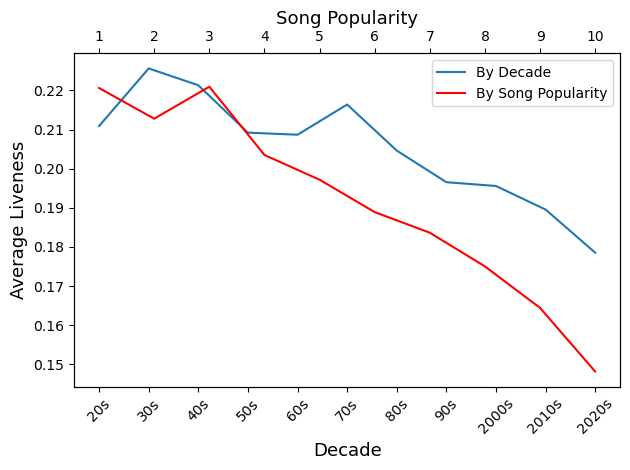

In [54]:
# Create a double line graph comparing means by decade and song popularity.
fig, ax1 = plt.subplots()
plt.xticks(rotation = 45)
ax1.plot(labels, decade_liveness, label="By Decade")
ax2 = ax1.twiny()
ax2.plot(pop_labels, pop_liveness, color="red", label="By Song Popularity")
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
ax1.set_xlabel("Decade", fontdict={"fontsize": 13})
ax1.set_ylabel("Average Liveness", fontdict={"fontsize": 13})
ax2.set_xlabel("Song Popularity", fontdict={"fontsize": 13})
fig.tight_layout()
plt.show()

## Explicitness

In [50]:
# Figure out the total number of songs for each decade.
total_songs_per_decade = pd.DataFrame(decade_with_variables.groupby(["Decade"]).count()["name"])

# Create a DataFrame with only explicit songs and figure out the total number of explicit songs for each decade.
explicit_songs = pd.DataFrame(decade_with_variables[decade_with_variables["explicit"] == 1])
explicit_songs_per_decade = pd.DataFrame(explicit_songs.groupby(["Decade"]).count()["name"])

# Divide explicit song counts by total song counts to figure out the percentage of explicit songs per decade.
explicit_percent = (explicit_songs_per_decade / total_songs_per_decade) * 100
explicit_percent

,name
Decade,
20s,13.363246
30s,6.189130
40s,7.107556
50s,0.775819
60s,0.056269
70s,0.355000
80s,2.322418
90s,11.511984
2000s,14.130103


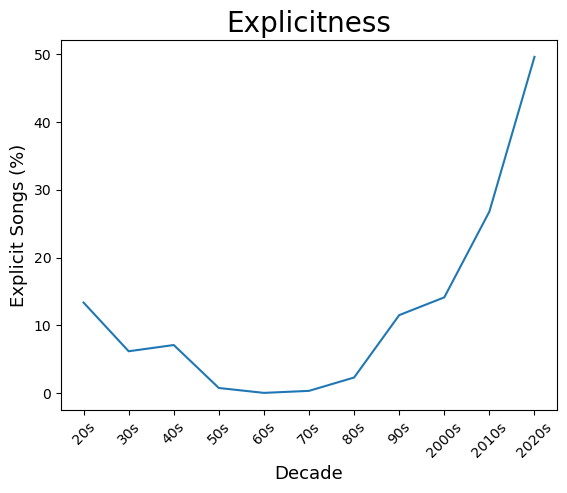

In [64]:
# Create a line graph of the DataFrame.
plt.plot(labels, explicit_percent)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.xticks(rotation = 45)
plt.ylabel("Explicit Songs (%)", fontdict={"fontsize": 13})
plt.title("Explicitness", fontdict={"fontsize": 20})
plt.show()

In [52]:
# Figure out the total number of songs for each popularity bin.
total_songs_per_pop_bin = pd.DataFrame(decade_with_variables.groupby(["Popularity Bin"]).count()["name"])

# Create a DataFrame with only explicit songs and figure out the total number of explicit songs for each popularity bin.
pop_explicit_songs = pd.DataFrame(decade_with_variables[decade_with_variables["explicit"] == 1])
explicit_songs_per_pop_bin = pd.DataFrame(pop_explicit_songs.groupby(["Popularity Bin"]).count()["name"])

# Divide explicit song counts by total song counts to figure out the percentage of explicit songs per popularity bin.
pop_explicit_percent = (explicit_songs_per_pop_bin / total_songs_per_pop_bin) * 100

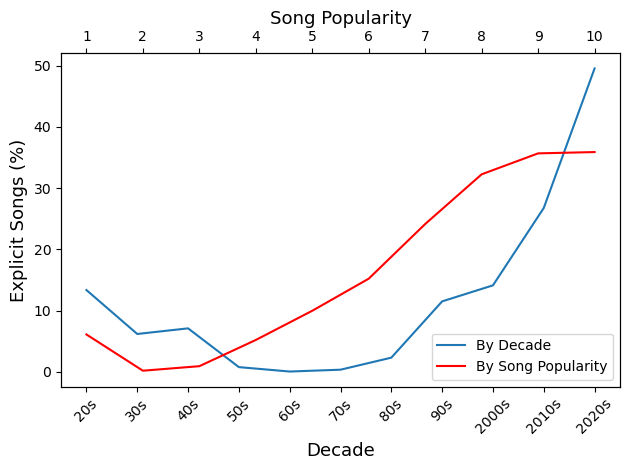

In [53]:
# Create a double line graph comparing means by decade and song popularity.
fig, ax1 = plt.subplots()
plt.xticks(rotation = 45)
ax1.plot(labels, explicit_percent, label="By Decade")
ax2 = ax1.twiny()
ax2.plot(pop_labels, pop_explicit_percent, color="red", label="By Song Popularity")
fig.legend(loc="lower right", bbox_to_anchor=(1,0), bbox_transform=ax1.transAxes)
ax1.set_xlabel("Decade", fontdict={"fontsize": 13})
ax1.set_ylabel("Explicit Songs (%)", fontdict={"fontsize": 13})
ax2.set_xlabel("Song Popularity", fontdict={"fontsize": 13})
fig.tight_layout()
plt.show()